
**Goal**: To build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. The goal is to assist in real-time monitoring and response efforts during critical events.

**Overview:** Twitter is widely used media platform and users share informations event in the emergent situations such as disaster, accidents, or natural crises. This project employs various NLP-based machine learning models to classify tweets as disaster-related or non-disaster-related. Using a dataset from Kaggle, these models are trained to identify whether a tweet is related to a disaster event. The primary focus is on improving recall, aiming to capture as many relevant disaster-related tweets as possible to support real-time monitoring and enhance response efforts during critical situations.



**Dataset:** [Kaggle](https://www.kaggle.com/c/nlp-getting-started/data)

The dataset provides 10,000 labeled tweets, and the task is to classify each tweet into two categories: disaster (1) or non-disaster (0).

**Techniqual used:**


1.   Text preprocessing and visualization (nltk and re).

We preprocess tweets using Python libraries such as nltk and re. This includes lowercasing, removing punctuation, tokenization, stop word removal, and lemmatization to reduce words to their base forms. Visualization of word distributions and token counts helps understand the data characteristics.

2.   Data splitting and randomization

The dataset is randomized and split into training and testing subsets using scikit-learn (sklearn) to ensure unbiased model evaluation.

3.   Text Vectorization (sklearn)
We apply TF-IDF vectorization (sklearn.feature_extraction.text.TfidfVectorizer) to convert textual data into numerical features. Parameters are carefully tuned:

(1)max_df to ignore very common terms (e.g., “and”, “u”, “im”),

(2) min_df to exclude very rare terms,

(3)ngram_range to consider unigrams, bigrams, and trigrams,

(4) removal of stop words to reduce noise.
4.   Model Building(sklearn)

Various NLP-based machine learning models are built using sklearn. Models are trained to classify tweets as disaster-related or non-disaster-related.

5.   Model Evaluation(sklearn)

Model performance is evaluated focusing on recall to maximize the detection of disaster-related tweets. Metrics and confusion matrices are used to assess the results.

6.   Disscussion of Improvement

Strategies such as removing unnecessary features and further hyperparameter tuning are considered to enhance model recall and overall prediction accuracy.


(1) Hyperparameter of logistic regression model
(2) Tune parameters to raise up the recall of the disaster group




**Key Finding:**

(1) If the goal is to maximize disaster detection (Recall): Using Class Weight + Threshold = 0.4 is the best choice, as it achieves the highest recall. However, it comes with a trade-off of more false positives (i.e., lower precision).

(2) If we want to balance accuracy and disaster detection ability: Applying Threshold = 0.4 or adding features (e.g., alert terms, tweet length, negative words) can provide a good F1-score and recall, without significantly reducing overall accuracy.

(3) The baseline model offers the highest overall accuracy, but it tends to miss more disaster cases due to its lower recall.

| **Tuning Strategy**                                    | **Recall (Class 1)** | **Accuracy** | **Precision (Class 1)** | **F1 Score (Class 1)** | **Remarks**                                                                |
| ------------------------------------------------------ | -------------------- | ------------ | ----------------------- | ---------------------- | -------------------------------------------------------------------------- |
| **Baseline** *(Original Logistic Regression)*          | 0.69                 | 82.7%        | 0.88                    | 0.77                   | Highest accuracy, but lower recall for disasters                           |
| **Class Weight Only**                                  | 0.74 ↑               | 78.99% ↓     | —                       | 0.75                   | Improves disaster sensitivity; slight drop in accuracy                     |
| **Threshold = 0.4 Only**                               | 0.77 ↑               | 77.3% ↓      | 0.72 ↓                  | 0.75                   | Good balance, more disaster tweets caught                                  |
| **Add Features (alert terms, length, negative words)** | 0.76 ↑               | 80.4% ↓      | 0.78 ↓                  | 0.77                   | Improves recall; slight drop in accuracy and precision                     |
| **Class Weight + Threshold = 0.4**                     | **0.82** ↑           | **74.7%** ↓  | 0.67 ↓                  | 0.74                   | Highest recall; largest drop in accuracy; useful for early warning systems |



#Step 1:Data Loading

In [ ]:
# Import libraries
import pandas as pd
import re
import nltk


In [2]:
# Step 1: Load the data from train.csv by pandas
df=pd.read_csv('train_tweet.csv')
df.head(15)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


# Step 2: Text Preprocessing and EDA




In [3]:
# Remove the unnecessary characteristics
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
def preprocess(sentences):
    sentences = [text.lower() for text in sentences]
    sentences = [re.sub(r"[^\w\s]","", text) for text in sentences]
    sentences= [" ".join(text.split()) for text in sentences]
    sentences=[word_tokenize(text) for text in sentences]
    # remove stop words
    stop_words=set(stopwords.words('english'))
    filtered_sentences=[]
    for text in sentences:
        filtered_sentence=[word for word in text if word not in stop_words]
        filtered_sentences.append(filtered_sentence)
    lemmatizer= WordNetLemmatizer()
    # lemmatize words and reconstituted a string
    lemmatized_sentences=[]
    for text in filtered_sentences:
        lemmatized=[lemmatizer.lemmatize(word) for word in text]
        lemmatized_sentences.append(' '.join(lemmatized))
    return lemmatized_sentences

In [5]:
# Applying the preprocessing
preprocessed_text=preprocess(df['text'])
df['preprocessed_text']=preprocessed_text
df.head(15)

,text,target,preprocessed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
5,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood
8,There's an emergency evacuation happening now ...,1,there emergency evacuation happening building ...
9,I'm afraid that the tornado is coming to our a...,1,im afraid tornado coming area


In [6]:
# Define the dissaterword and non-disaster
disaster=df[df['target']==1]
non_disaster=df[df['target']==0]

In [7]:
disaster.head(15)


,text,target,preprocessed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
5,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood
8,There's an emergency evacuation happening now ...,1,there emergency evacuation happening building ...
9,I'm afraid that the tornado is coming to our a...,1,im afraid tornado coming area


In [8]:
df['target'].value_counts()

,count
target,
0,4342
1,3271


Number of disaster:target
1    3271
Name: count, dtype: int64
Numberof non-disasters:target
0    4342
Name: count, dtype: int64
Counts:{0: np.int64(4342), 1: np.int64(3271)}


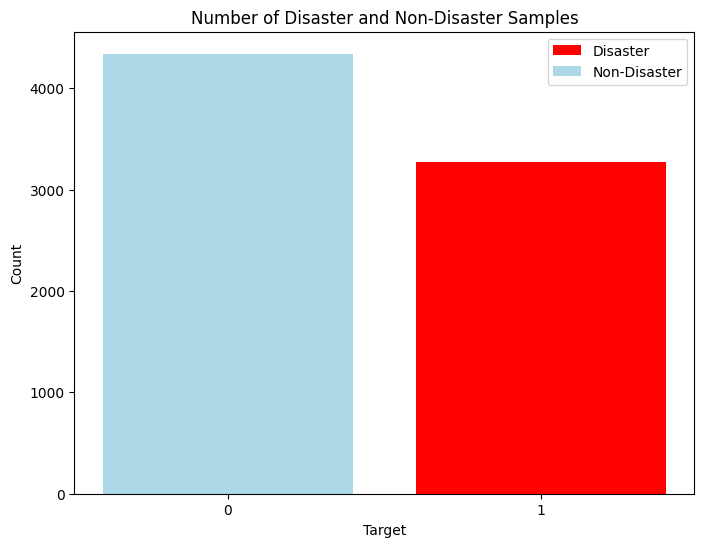

In [9]:
# check the samples in disasters and non-disasters

nr_disaster=disaster['target'].value_counts()
nr_non_disaster=non_disaster['target'].value_counts()
print(f'Number of disaster:{nr_disaster}')
print(f'Numberof non-disasters:{nr_non_disaster}')
counts={0:nr_non_disaster.get(0,0), 1:nr_disaster.get(1,0)}
print(f'Counts:{counts}')

# Plot the barchart of two groups
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.bar([1], [counts[1]], label='Disaster', color='red')
plt.bar([0], [counts[0]], label='Non-Disaster', color='lightblue')
plt.xticks([0,1])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Number of Disaster and Non-Disaster Samples')
plt.legend()
plt.show()

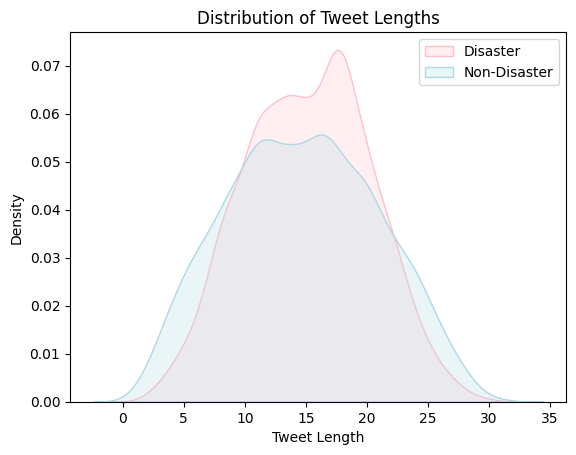

In [10]:
# calcuate the kernel density of tweet length

# define tweet_lengths
disaster_tweet_lengths=[len(text.split()) for text in df[df['target']==1]['text']]
non_disaster_tweet_lengths=[len(text.split()) for text in df[df['target']==0]['text']]
tweet_lengths=disaster_tweet_lengths+non_disaster_tweet_lengths
#
# plot the kernel density
sns.kdeplot(disaster_tweet_lengths, fill=True, color='pink')
sns.kdeplot(non_disaster_tweet_lengths, fill=True, color='lightblue')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Distribution of Tweet Lengths')
plt.legend(['Disaster', 'Non-Disaster'])
plt.show()

In [11]:
# Tokenize the text
def tokenize_words(text):
    tokens=list()
    for sentence in text:
        tokens.extend(word_tokenize(sentence))
    return tokens

In [12]:
disaster_tokens=tokenize_words(disaster['preprocessed_text'])
non_disaster_tokens=tokenize_words(non_disaster['preprocessed_text'])

In [13]:
disaster_tokens[:100]

['deed',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'u',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'resident',
 'asked',
 'shelter',
 'place',
 'notified',
 'officer',
 'evacuation',
 'shelter',
 'place',
 'order',
 'expected',
 '13000',
 'people',
 'receive',
 'wildfire',
 'evacuation',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfire',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'direction',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfire',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cause',
 'flash',
 'flooding',
 'street',
 'manitou',
 'colorado',
 'spring',
 'area',
 'im',
 'top',
 'hill',
 'see',
 'fire',
 'wood',
 'there',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'street',
 'im',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha',
 'south',
 'tampa',
 'getting',

In [14]:
non_disaster_tokens[:100]

['whats',
 'man',
 'love',
 'fruit',
 'summer',
 'lovely',
 'car',
 'fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london',
 'cool',
 'love',
 'skiing',
 'wonderful',
 'day',
 'looooool',
 'wayi',
 'cant',
 'eat',
 'shit',
 'nyc',
 'last',
 'week',
 'love',
 'girlfriend',
 'cooool',
 'like',
 'pasta',
 'end',
 'always',
 'try',
 'bring',
 'heavy',
 'metal',
 'rt',
 'httptcoyao1e0xngw',
 'cry',
 'set',
 'ablaze',
 'plus',
 'side',
 'look',
 'sky',
 'last',
 'night',
 'ablaze',
 'httptcoqqsmshaj3n',
 'phdsquares',
 'mufc',
 'theyve',
 'built',
 'much',
 'hype',
 'around',
 'new',
 'acquisition',
 'doubt',
 'set',
 'epl',
 'ablaze',
 'season',
 'ablaze',
 'lord',
 'check',
 'httptcoroi2nsmejj',
 'httptco3tj8zjin21',
 'httptcoyduixefipe',
 'httptcolxtjc87kls',
 'nsfw',
 'outside',
 'youre',
 'ablaze',
 'alive',
 'youre',
 'dead',
 'inside',
 'awesome',
 'time',
 'visiting',
 'cfc',
 'head',
 'office',
 'ancop',
 'site',
 'ablaze',
 'thanks',
 'tita',
 'vida',
 'taking',
 'care',
 'u',
 'sooo

In [15]:
# Count the tokens
disaster_counter=Counter(disaster_tokens)
non_disaster_counter=Counter(non_disaster_tokens)

In [16]:
disaster_top_words=disaster_counter.most_common(50)

In [17]:
non_disaster_top_words=non_disaster_counter.most_common(50)

In [18]:
disaster_df=pd.DataFrame(disaster_top_words, columns=['Word', 'Count'])
non_disaster_df=pd.DataFrame(non_disaster_top_words, columns=['Word', 'Count'])

In [21]:
disaster_df.head(15)

,Word,Count
0,fire,262
1,news,136
2,via,121
3,disaster,117
4,california,115
5,suicide,110
6,police,107
7,people,106
8,amp,106
9,family,105


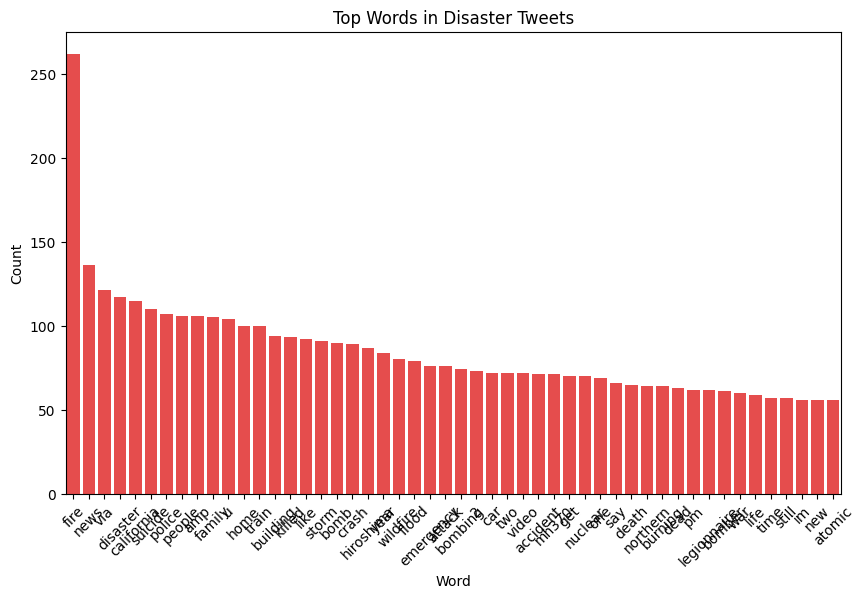

In [22]:
# Visualization of top words in disaster tweets
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=disaster_df, color='red', alpha=0.8)
plt.title('Top Words in Disaster Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
non_disaster_df.head(100)

,Word,Count
0,like,255
1,im,243
2,amp,192
3,get,185
4,new,168
5,u,142
6,dont,141
7,one,135
8,body,116
9,time,103


In [24]:
#List all words in the non_diasters
non_disaster_tokens=tokenize_words(non_disaster['preprocessed_text'])
non_disaster_counter=Counter(non_disaster_tokens)
non_disaster_top_words=non_disaster_counter.most_common(50)
non_disaster_df=pd.DataFrame(non_disaster_top_words, columns=['Word', 'Count'])
non_disaster_df

,Word,Count
0,like,255
1,im,243
2,amp,192
3,get,185
4,new,168
5,u,142
6,dont,141
7,one,135
8,body,116
9,time,103


Text(0, 0.5, 'Count')

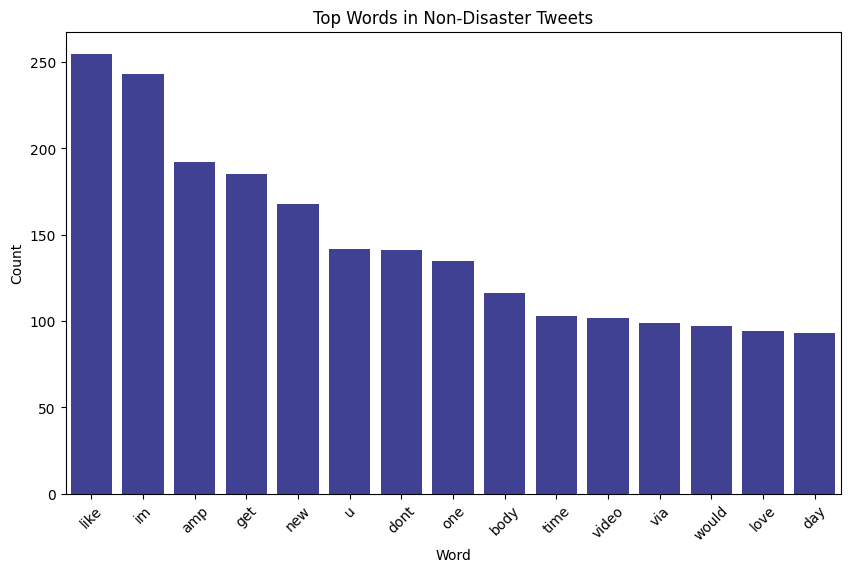

In [ ]:
# Plot barchart of the non_disaster
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=non_disaster_df, color='darkblue', alpha=0.8)
plt.xticks(rotation=45)
plt.title('Top Words in Non-Disaster Tweets')
plt.xlabel('Word')
plt.ylabel('Count')

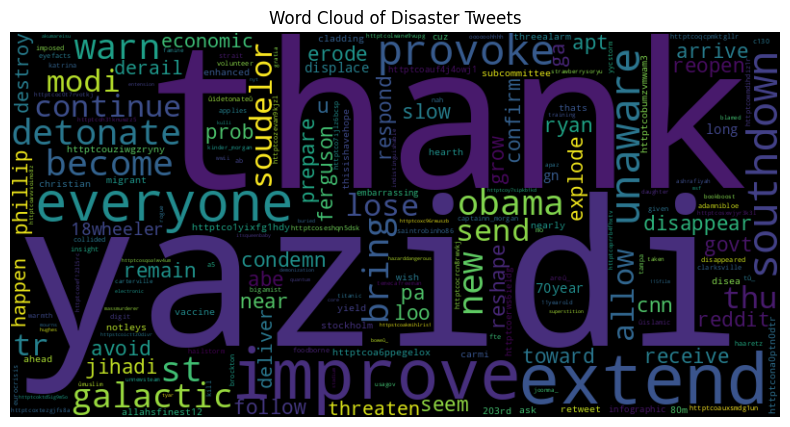

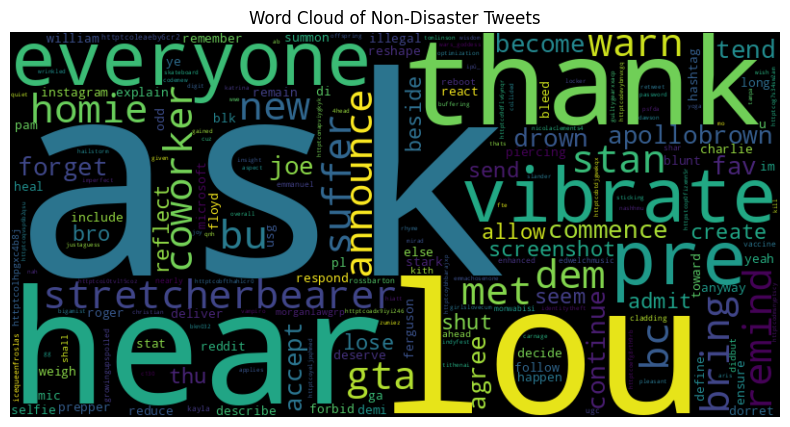

In [26]:
# Plot the WordCloud of disaster group and non-disaster group

# set unique tokens of the disaster and non-disaster group
disaster_unique_tokens=set(disaster_tokens)
non_disaster_unique_tokens=set(non_disaster_tokens)
english_stopwords=set(stopwords.words('english'))


# build the Unique wordcloud and remove the stopwords
disaster_wordcloud=WordCloud(width=800, height=400, background_color='black', stopwords=english_stopwords).generate(' '.join(disaster_unique_tokens))
non_disaster_wordcloud=WordCloud(width=800, height=400, background_color='black', stopwords=english_stopwords).generate(' '.join(non_disaster_unique_tokens))

# plot the disaster wordcloud and non-disasterwordcloud
plt.figure(figsize=(10,5))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Tweets')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Non-Disaster Tweets')
plt.show()


Based on the word cloud, there are commonly used words that appear in both disaster and non-disaster tweets. Therefore, when choosing text vectorization, it is better to use TF-IDF to reduce the importance of these common words.

# Step 3:  Split the dataset and randomize the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
# set the copy of df
df_copy=df.copy()
# randomize the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head(15)

,text,target,preprocessed_text
0,Weapons: Twin Knives #OjouBot,0,weapon twin knife ojoubot
1,The few I warned about .. Were just as I expec...,0,warned expected threat soul
2,Just burned the crap out of my grilled cheese ...,0,burned crap grilled cheese sandwich sure wish ...
3,Father-of-three Lost Control of Car After Over...,1,fatherofthree lost control car overtaking coll...
4,destroy the free fandom honestly,1,destroy free fandom honestly
5,@Mayhem_114 are you reading right to left,0,mayhem_114 reading right left
6,White Twister Black shift knob M6x1.00 Thread ...,0,white twister black shift knob m6x100 thread s...
7,MotoGP Indianapolis: Espargaro: Layout 'worrie...,0,motogp indianapolis espargaro layout worry lit...
8,Heavy smoke pouring out of buildings on fire i...,1,heavy smoke pouring building fire port coquitl...
9,@CoreyAshe Did that look broken or bleeding?,0,coreyashe look broken bleeding


In [28]:
# Split the dataset, set  test_data 0.2, stratify['target]
train_df,test_df=train_test_split(df,test_size=0.2,stratify=df['target'], random_state=42)


# Step 4: Text Vectorization

In [29]:
# Define the Vectorizer
tfidf_vectorizer=TfidfVectorizer()
# Vectorize the text
X_train=tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])
X_test=tfidf_vectorizer.transform(test_df['preprocessed_text'])

In [34]:
# Set the y train and y test
y_train=train_df['target']
y_test=test_df['target']

# Step 5: Set the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

(1) Logistic Regression Model

In [35]:
# from sklearn.linear_model import LogisticalRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

(2) Random Forest Model

In [36]:
# import random forest Model
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# import XGBoostclassifier Model
xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
# Import SVC Model
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

# Step 6: Evaluate the Model

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [56]:
# Evaluate the model:
def evaluate_model(model, X_test, y_test, model_name="Model", labels=[0, 1]):

    y_pred=model.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

    print(f'class_report_model:\n{class_report}')
    print(f'accuracy_model:{accuracy}')
    print(f'confusion_matrix:\n{conf_matrix}')

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.tight_layout()
    plt.show()

    return class_report, accuracy, conf_matrix


class_report_model:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       869
           1       0.88      0.69      0.77       654

    accuracy                           0.83      1523
   macro avg       0.84      0.81      0.82      1523
weighted avg       0.83      0.83      0.82      1523

accuracy_model:0.8266579120157583
confusion_matrix:
[[805  64]
 [200 454]]


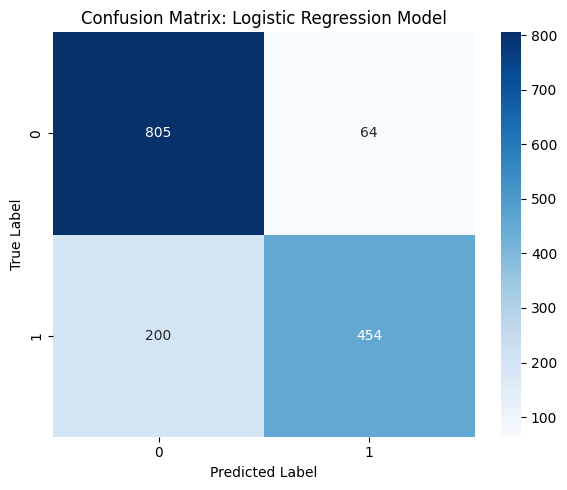

In [57]:
# Logistic model
class_report_logistic_model, accuracy_logistic_model, confusion_matrix_logistic_model = evaluate_model(log_model, X_test, y_test, model_name="Logistic Regression Model")

class_report_model:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3473
           1       0.96      0.79      0.87      2617

    accuracy                           0.89      6090
   macro avg       0.91      0.88      0.89      6090
weighted avg       0.90      0.89      0.89      6090

accuracy_model:0.8945812807881773
confusion_matrix:
[[3380   93]
 [ 549 2068]]


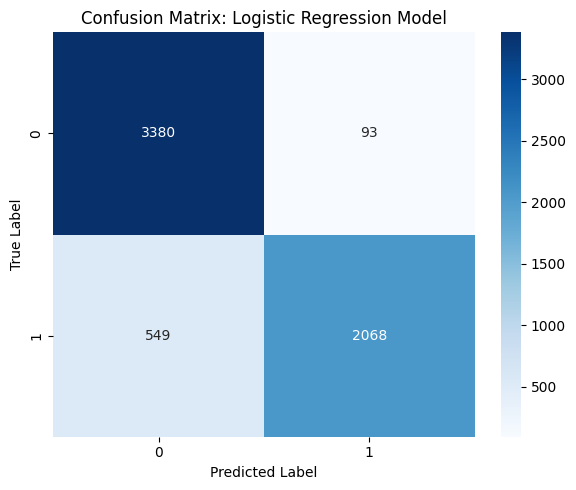

In [58]:
# Evaluate the train data of logistic regression model

class_report_logistic_model, accuracy_logistic_model, confusion_matrix_logistic_model = evaluate_model(log_model, X_train, y_train, model_name="Logistic Regression Model")


The difference in recall between the disaster and non-disaster groups in the training data (0.97 – 0.79 = 0.17) is smaller than the difference in recall in the test data (0.93 – 0.69 = 0.24).

This might indicate overfitting, where the model performs well on training data but less so on test data, especially for the class with lower recall (usually the minority class, e.g., disasters).

class_report_model:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       869
           1       0.81      0.70      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

accuracy_model:0.8017071569271176
confusion_matrix:
[[765 104]
 [198 456]]


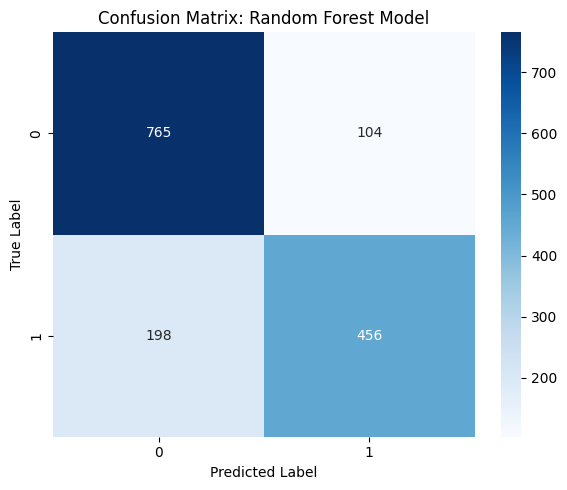

In [59]:
# Evaluation the test data of random forest model
class_report_rf_model, accuracy_rf_model, confusion_matrix_rf_model = evaluate_model(rf_model, X_test, y_test, model_name="Random Forest Model")



class_report_model:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       869
           1       0.83      0.62      0.71       654

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.77      1523
weighted avg       0.79      0.78      0.78      1523

accuracy_model:0.7820091923834537
confusion_matrix:
[[788  81]
 [251 403]]


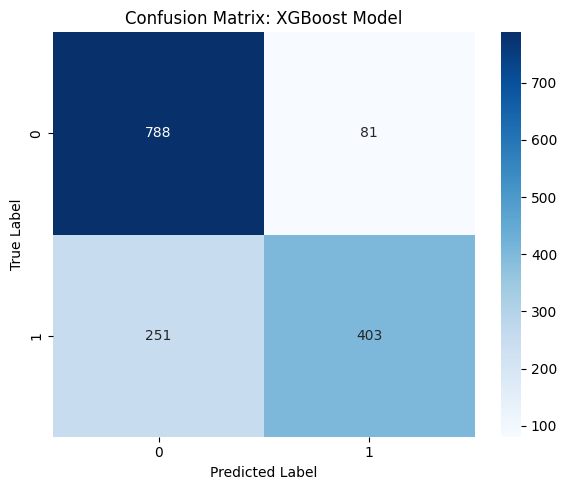

In [60]:
# Evaluation the xgboost model
class_report_xgb_model, accuracy_xgb_model, confusion_matrix_xgb_model = evaluate_model(xgb_model, X_test, y_test, model_name="XGBoost Model")


class_report_model:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       869
           1       0.88      0.68      0.77       654

    accuracy                           0.82      1523
   macro avg       0.84      0.81      0.81      1523
weighted avg       0.83      0.82      0.82      1523

accuracy_model:0.8227183191070256
confusion_matrix:
[[806  63]
 [207 447]]


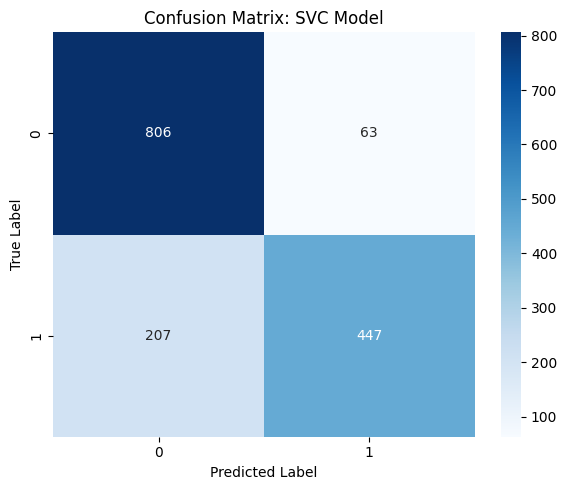

In [61]:
# Evaluation the svc model
class_report_svc_model, accuracy_svc_model, confusion_matrix_svc_model = evaluate_model(svc_model, X_test, y_test, model_name="SVC Model")

# Model Evaluation and Comparsion
We evaluated four different NLP-based machine learning models for classifying disaster-related tweets: Logistic Regression, Random Forest, XGBoost, and Support Vector Classifier (SVC). The evaluation metrics include precision, recall, F1-score, accuracy, and confusion matrices. Our main focus is on recall for the disaster-related class (label 1), since correctly identifying disaster tweets is critical for timely alerts.

| Model               | Accuracy | Precision (1) | Recall (1) | F1-score (1) | TP  | FN  |
| ------------------- | -------- | ------------- | ---------- | ------------ | --- | --- |
| Logistic Regression | **0.83** | 0.88          | 0.69       | 0.77         | 454 | 200 |
| Random Forest       | 0.78     | 0.83          | 0.62       | 0.71         | 403 | 251 |
| XGBoost             | 0.82     | 0.88          | 0.68       | 0.77         | 447 | 207 |
| SVC                 | 0.80     | 0.81          | **0.70**   | 0.75         | 456 | 198 |


**Summary of modelling:**

Best Recall (Disaster Class): SVC (0.70) → Suitable for an early warning system

Highest Overall Accuracy: Logistic Regression (0.83)

Stable F1-score: Logistic Regression and XGBoost both achieve 0.77 for the disaster class

Lower Recall in Random Forest: Recall of 0.62 suggests a higher risk of missing disaster cases


Based on the Accuracy and Recall(1), we choose the Logistical Regression model for further improvement.

# Step 7: Improve the model


(1) hyperparameter of the logistic model

(2) raise the recall value of disaster classification


1. tune the threshold

2. tune the class weight

3. Add the alert terms, text length and negative words to create the new feature







              



# Hyparameters: Use the Logistic Model to find the best parameter

In [31]:
# Tune the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# create new features based on the tokens
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack

In [39]:
# set the pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])
param_grid={
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 1, 10],
}
grid_search=GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(train_df['preprocessed_text'], train_df['target'])

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


Best parameters: {'clf__C': 1, 'tfidf__max_df': 0.5, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 3)}
Best score: 0.7933950171204094


In [44]:
best_pipeline=Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1))), ('clf', LogisticRegression(max_iter=1000, C=1))])
best_pipeline.fit(train_df['preprocessed_text'], train_df['target'])
y_pred_best=best_pipeline.predict(test_df['preprocessed_text'])
class_report_best=classification_report(test_df['target'], y_pred_best)
accuracy_best=accuracy_score(test_df['target'], y_pred_best)
confusion_matrix_best=confusion_matrix(test_df['target'], y_pred_best)
# print the evalaution report
print(f'class_report_best:\n{class_report_best}')
print(f'accuracy_best:{accuracy_best}')
print(f'confusion_matrix_best:\n{confusion_matrix_best}')

class_report_best:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       869
           1       0.84      0.69      0.76       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.81      1523

accuracy_best:0.8082731451083388
confusion_matrix_best:
[[780  89]
 [203 451]]


### All models are high missclassification of disaster group.We try to rasie the recall of disaster group.
(1) tune the threshold

(2) tune the class weight

(3) Add the alert terms, text length and negative words to the features of text

In [ ]:
# tune the threshold, from 0.5 to 0.4
y_proba=best_pipeline.predict_proba(test_df['preprocessed_text'])[:,1]
# define the threshold as 0.4
y_pred_custom=(y_proba>0.4).astype(int)
class_report_custom=classification_report(test_df['target'], y_pred_custom)
accuracy_custom=accuracy_score(test_df['target'], y_pred_custom)
confusion_matrix_custom=confusion_matrix(test_df['target'], y_pred_custom)
# Print the evaluation results
print(f'class_report_custom:\n{class_report_custom}')
print(f'accuracy_custom:{accuracy_custom}')
print(f'confusion_matrix_custom:\n{confusion_matrix_custom}')

class_report_custom:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       869
           1       0.72      0.77      0.75       654

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.77      0.77      1523

accuracy_custom:0.7734734077478661
confusion_matrix_custom:
[[673 196]
 [149 505]]


In [ ]:
# Tune the class weight
best_pipeline_rev=Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1))), ('clf', LogisticRegression(max_iter=1000, C=1, class_weight='balanced'))])
best_pipeline_rev.fit(train_df['preprocessed_text'], train_df['target'])
y_pred_best_rev=best_pipeline_rev.predict(test_df['preprocessed_text'])
class_report_best_rev=classification_report(test_df['target'], y_pred_best_rev)
accuracy_best_rev=accuracy_score(test_df['target'], y_pred_best_rev)
confusion_matrix_best_rev=confusion_matrix(test_df['target'], y_pred_best_rev)
# print the evalaution report
print(f'class_report_best_rev:\n{class_report_best_rev}')
print(f'accuracy_best_rev:{accuracy_best_rev}')
print(f'confusion_matrix_best_rev:\n{confusion_matrix_best_rev}')

class_report_best_rev:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       869
           1       0.76      0.74      0.75       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

accuracy_best_rev:0.7898883782009193
confusion_matrix_best_rev:
[[717 152]
 [168 486]]


In [62]:
# Add the alert words, negative words and length of words to the text

# Define the alert words
alert_words=['help','emergency', 'urgent', 'rescue', 'fire', 'earthquake', 'flood','disaster','tornado']
negative_words=['no', 'hate', 'bad', 'terrible', 'kill', 'death']

def extract_manual_features(text):
    return pd.DataFrame({
        'alert_words':text.apply(lambda x: int(any(word in x for word in alert_words))),
        'negative_words':text.apply(lambda x: int(any(word in x for word in negative_words))),
        'text_length':text.apply(lambda x: len(x.split()))
    })


# define manual_feature_transformer
manual_feature_transformer=FunctionTransformer(extract_manual_features, validate=False)

In [63]:
# Combine with tfidf

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1)), 'preprocessed_text'),
        ('manual', manual_feature_transformer, 'preprocessed_text')
    ]
)

pipeline_extra = Pipeline([
    ('features', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])



In [48]:
# Train the model
pipeline_extra.fit(train_df,train_df['target'])
y_pred_extra=pipeline_extra.predict(test_df)

In [49]:
# Evaluate the model
print("Classification Report:\n", classification_report(test_df['target'], y_pred_extra))
print("Accuracy:", accuracy_score(test_df['target'], y_pred_extra))
print("Confusion Matrix:\n", confusion_matrix(test_df['target'], y_pred_extra))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       869
           1       0.78      0.76      0.77       654

    accuracy                           0.80      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.80      0.80      0.80      1523

Accuracy: 0.8036769533814839
Confusion Matrix:
 [[727 142]
 [157 497]]


In [ ]:
# try to combine with threshold 0.4 and class='balanced'
y_proba=pipeline_extra.predict_proba(test_df)[:,1]
y_pred_custom=(y_proba>0.4).astype(int)

# Evalute the combined model
print("Classification Report:\n", classification_report(test_df['target'], y_pred_custom))
print("Accuracy:", accuracy_score(test_df['target'], y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(test_df['target'], y_pred_custom))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       869
           1       0.67      0.82      0.74       654

    accuracy                           0.75      1523
   macro avg       0.75      0.76      0.75      1523
weighted avg       0.76      0.75      0.75      1523

Accuracy: 0.7465528562048588
Confusion Matrix:
 [[600 269]
 [117 537]]


In [ ]:
# try to set threshold as 0.45
y_proba=pipeline_extra.predict_proba(test_df)[:,1]
y_pred_custom=(y_proba>0.45).astype(int)
# evaluate the combined group
print("Classification Report:\n", classification_report(test_df['target'], y_pred_custom))
print("Accuracy:", accuracy_score(test_df['target'], y_pred_custom))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       869
           1       0.71      0.78      0.74       654

    accuracy                           0.77      1523
   macro avg       0.76      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523

Accuracy: 0.767564018384767


## Conclusion:
| **Tuning Strategy**                                    | **Recall (Class 1)** | **Accuracy** | **Precision (Class 1)** | **F1 Score (Class 1)** | **Remarks**                                                                |
| ------------------------------------------------------ | -------------------- | ------------ | ----------------------- | ---------------------- | -------------------------------------------------------------------------- |
| **Baseline** *(Original Logistic Regression)*          | 0.69                 | 82.7%        | 0.88                    | 0.77                   | Highest accuracy, but lower recall for disasters                           |
| **Class Weight Only**                                  | 0.74 ↑               | 78.99% ↓     | —                       | 0.75                   | Improves disaster sensitivity; slight drop in accuracy                     |
| **Threshold = 0.4 Only**                               | 0.77 ↑               | 77.3% ↓      | 0.72 ↓                  | 0.75                   | Good balance, more disaster tweets caught                                  |
| **Add Features (alert terms, length, negative words)** | 0.76 ↑               | 80.4% ↓      | 0.78 ↓                  | 0.77                   | Improves recall; slight drop in accuracy and precision                     |
| **Class Weight + Threshold = 0.4**                     | **0.82** ↑           | **74.7%** ↓  | 0.67 ↓                  | 0.74                   | Highest recall; largest drop in accuracy; useful for early warning systems |




(1) If the goal is to maximize disaster detection (Recall):
Using Class Weight + Threshold = 0.4 is the best choice, as it achieves the highest recall. However, it comes with a trade-off of more false positives (i.e., lower precision).

(2) If we want to balance accuracy and disaster detection ability:
Applying Threshold = 0.4 or adding features (e.g., alert terms, tweet length, negative words) can provide a good F1-score and recall, without significantly reducing overall accuracy.

(3) The baseline model offers the highest overall accuracy, but it tends to miss more disaster cases due to its lower recall.